$\underline{\Large \bf \mbox{Implementación numérica de esperanzas condicionales usando redes neuronales}}$

${\bf Equipo Docente:} \mbox{ Profesor Joaquín Fontbona y Auxiliares: Catalina Lizana, Álvaro Márquez y Matías Ortiz}$

${\bf Nombre: Melanie Sánchez Pfeiffer}$

Dadas $X$, $Y$ variables aleatorias reales en $(\Omega,{\cal F},\mathbb{P})$, se sabe que la esperanza condicional $\mathbb{E}(Y|X)$ es la proyección ortogonal de $Y$ en $(\Omega,\sigma(X),\mathbb{P})$, por lo tanto, es la función medible de $X$ más cercana a $Y$ en $L^2$. Es decir, $\hat{f}=\mathbb{E}(Y|X)$ es la única solución del problema 
$$\min_{f\in K}\mathbb{E}[f(X)-Y]^2$$
donde $K$ es el conjunto de todas las funciones medibles $f:\mathbb{R} \to \mathbb{R}$ tal que $f(X)\in L^2(\Omega,{\cal F},\mathbb{P})$.Sea $\mu=Ley(X)$ y definimos el conjunto $F_{N,\varphi}$ como todas las redes neuronales $f_{\theta}:\mathbb{R} \to \mathbb{R}$ formadas por 2 capas, $N$ neuronas, con función de activación $\varphi$ y parametrizadas por $\theta\in\mathbb{R}^{D(N)}$. Por el Teorema de Hornik sobre la universalidad de redes neuronales en $L^2(\mu)$ tenemos que $\forall \epsilon >0$, $\exists N\in \mathbb{N}$ y $\theta\in\mathbb{R}^{D(N)}$ tal que:
$$\displaystyle{\int |f_{\theta}(x)-\hat{f}(x)|^2\mu(dx)}< \epsilon$$
o análogament
$$\mathbb{E}([f_{\theta}(x) - \mathbb{E}(Y|X=x)]^2)< \epsilon. $$

${\Large \bf Proyecto:}$

Observamos que:
$$ \mathbb{E}([f_{\theta}(x)-\hat{f}(x)]^2)= \mathbb{E}([f_{\theta}(X)-Y]^2) + \mathbb{E}(\hat{f}(x)^2)-\mathbb{E}(Y^2)$$

de donde se obtiene:
$$\arg \min_{\theta}\mathbb{E}([f_{\theta}(x)-\hat{f}(x)]^2)= \arg \min_{\theta} \mathbb{E}([f_{\theta}(X)-Y]^2) $$

Por lo que se propone entrenar una red neuronal para que encuentre la funci\'on $f_{\theta}$, es decir, una aproximación de la función $\hat{f}(x)=\mathbb{E}(Y|X=x)$, buscando 

$$\hat{\theta}= \arg \min_{\theta} \mathbb{E}([f_{\theta}(X)-Y]^2).$$ 
Para esto y para un par de variables aleatorias $(X,Y)$ dadas se implementará S.G.D, en base a una muestra $(X_i,Y_i)\mbox{\,i.i.d} =^{ley} (X,Y)$ con $f_{\theta}$ una red neuronal de 2 capas y $N$ neurona. 

.$e:
vspace{-0.3cm}

Demostrar que:
 $$\mathbb{E}([f_{\theta}(x)-\hat{f}(x)]^2)= \mathbb{E}([f_{\theta}(X)-Y]^2) + \mathbb{E}(\hat{f}(x)^2) -\mathbb{E}(Y^2)$$

Dem: Desarrollamos primero el lado izquierdo:
$$\mathbb{E}([f_{\theta}(x)-\hat{f}(x)]^2)=\mathbb{E}(f_{\theta}^2(x)-2f_{\theta}(x)\hat{f}(x)+\hat{f}^2(x))=\mathbb{E}(f_{\theta}^2(x)) + 2\mathbb{E}(f_{\theta}(x)\hat{f}(x))+\mathbb{E}(\hat{f}^2(x)) $$
Desarrollamos el primer término del lado derecho:
$$\mathbb{E}([f_{\theta}(X)-Y]^2)=\mathbb{E}(f_{\theta}^2(X))+2\mathbb{E}(f_{\theta}(X)Y)+\mathbb{E}(Y^2)$$
Igualando ambos lados, se cancelan términos y nos queda que:
$$\mathbb{E}(f_{\theta}(X)\hat{f}(x))=\mathbb{E}(f_{\theta}(X)Y)$$
que es lo que debemos demostrar.
Luego, como $f_{\theta}$ es $\sigma(X)$- medible se tiene por propiedad de las esperanza condicional que:
$$\mathbb{E}(f_{\theta}(X)Y)=\mathbb{E}[\mathbb{E}(f_{\theta}(X)Y|X=x)]=\mathbb{E}[f_{\theta}(X)\mathbb{E}(Y|X=x)]=\mathbb{E}[f_{\theta}(X)\hat{f}(x)]$$


In [16]:
 import numpy as np

#Implementación de Red Neuronal de 2 capas y función de activacion una sigmoide

def sigmoid(x):
    """Función de activación sigmoide."""
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    """Derivada de la función de activación sigmoide."""
    return x * (1 - x)

def train_neural_network(inputs, outputs, epochs, size):
    input_layer_size = 1
    hidden_layer_size = 4
    output_layer_size = 1

    # Inicialización de pesos y sesgos de manera aleatoria
    np.random.seed(1)
    weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
    biases_hidden = np.zeros((1, hidden_layer_size))
    weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
    biases_output = np.zeros((1, output_layer_size))

    Salida=[]
    Peso_Entrada=[]
    Peso_Salida=[]
    Bia_Entrada=[]
    Bia_Salida=[]
    # Entrenamiento de la red neuronal
    for i in range(size):
        for epoch in range(epochs):
            # Capa de entrada a capa oculta
            hidden_inputs = np.dot(inputs[i], weights_input_hidden) + biases_hidden
            hidden_outputs = sigmoid(hidden_inputs)
            
            # Capa oculta a capa de salida
            final_inputs = np.dot(hidden_outputs, weights_hidden_output) + biases_output
            final_outputs = final_inputs

            # Cálculo del error
            output_error = outputs[i] - final_outputs
            hidden_error = output_error.dot(weights_hidden_output.T)

            # Retropropagación del error y actualización de pesos y sesgos
            output_delta = output_error
            hidden_delta = hidden_error * deriv_sigmoid(hidden_outputs)

            weights_hidden_output += hidden_outputs.T.dot(output_delta)
            biases_output += np.sum(output_delta, axis=0, keepdims=True)
            weights_input_hidden += inputs[i]*(hidden_delta)
            biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) 
            if epoch < epochs: epoch= epoch + 1
            if epoch==epochs: Salida.append(final_outputs), Peso_Entrada.append(weights_input_hidden), Peso_Salida.append(weights_hidden_output), Bia_Entrada.append(biases_hidden), Bia_Salida.append(biases_output)

    print("Salida:", Salida), print("Peso Entrada:", Peso_Entrada), print("Peso Salida:",  Peso_Salida), print("Bia Entrada:",Bia_Entrada), print("Bia Salida:", Bia_Salida)
    return Salida, Peso_Entrada, Peso_Salida, Bia_Entrada, Bia_Salida
    


In [17]:
# Ejemplo de entrenamiento con datos de entrada y salida variables uniformes
inputs = np.random.uniform(size=200)
outputs = np.random.uniform(size=200)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.2, train_size=0.8)
print('Numero de datos (input): ', inputs.shape[0])
print('Tamaño de conjunto de entrenamiento (input): ', X_train.shape[0])
print('Tamaño de conjunto de validación (input): ',X_test.shape[0])
print('Numero de datos input (output): ', outputs.shape[0])
print('Tamaño de conjunto de entrenamiento (output): ', Y_train.shape[0])
print('Tamaño de conjunto de validación (output): ',Y_test.shape[0])

Numero de datos (input):  200
Tamaño de conjunto de entrenamiento (input):  160
Tamaño de conjunto de validación (input):  40
Numero de datos input (output):  200
Tamaño de conjunto de entrenamiento (output):  160
Tamaño de conjunto de validación (output):  40


In [19]:
#Ejemplo de red neuronal
inputs=X_train
outputs=Y_train
size=len(X_train)
epochs=30
# Entrenamiento de la red neuronal 
result = train_neural_network(inputs, outputs, epochs, size)

Salida: [array([[0.70292936]]), array([[0.46565852]]), array([[0.67234218]]), array([[0.98837423]]), array([[0.71862299]]), array([[0.83806629]]), array([[0.89051848]]), array([[0.84770491]]), array([[0.16568294]]), array([[0.15757961]]), array([[0.17805336]]), array([[0.95871044]]), array([[0.16041636]]), array([[0.80907727]]), array([[0.86118965]]), array([[0.58535298]]), array([[0.48674271]]), array([[0.64675391]]), array([[0.87927177]]), array([[0.31922379]]), array([[0.62511159]]), array([[0.68001914]]), array([[0.50572622]]), array([[0.45697791]]), array([[0.51521666]]), array([[0.3788469]]), array([[0.48006293]]), array([[0.35641009]]), array([[0.5737319]]), array([[0.15115604]]), array([[0.48432156]]), array([[0.20305785]]), array([[0.27740547]]), array([[0.65368976]]), array([[0.899064]]), array([[0.73813097]]), array([[0.20367433]]), array([[0.51059931]]), array([[0.99976912]]), array([[0.79966119]]), array([[0.04483659]]), array([[0.21749922]]), array([[0.57352097]]), array(

In [20]:
#Funciones sin sigmoide dentro de la red neuronal
#Para verificar buen funcionamiento

def RedN(w1,w2,b1,b2,x):
    X1=np.dot(x,w1)+b1
    S_X1=sigmoid(X1)
    X2=np.dot(S_X1,w2)+b2
    return X1,X2

In [21]:
#derivadas para gradiente SGD

def derivate_weight(w1,w2,b1,b2,x):
    X1=np.dot(x,w1)+b1
    S_X1=sigmoid(X1)
    X2=np.dot(S_X1,w2)+b2
    D_S1=deriv_sigmoid(X1)

    D_W1=w2*D_S1*x
    D_W2=S_X1
    return D_W1,D_W2
    
def derivate_bias(w1,w2,b1,b2,x):
    X1=np.dot(x,w1)+b1
    S_X1=sigmoid(X1)
    X2=np.dot(S_X1,w2)+b2
    D_S1=deriv_sigmoid(X1)
    
    D_B1=w2*D_S1
    D_B2=1
    return D_B1, D_B2

In [22]:
#Verificando resultados de funciones derivadas
red=result
x=inputs[0]
W1=np.array(red[1][0])
w2=np.array(red[2][0])
W2=w2.flatten()
b1=np.array(red[3][0])
b2=red[4][0].item()
print(W1,W2,b1,b2)

derivada_peso= derivate_weight(W1,W2,b1,b2,x)
derivada_bias= derivate_bias(W1,W2,b1,b2,x)
funcion=RedN(W1,W2,b1,b2,x)
print("Derivada Peso:", derivada_peso[0], derivada_peso[1])
print("Derivada Bias:", derivada_bias[0], derivada_bias[1])
print("Valores Capas", funcion)

[[-0.16777185  0.07779542 -0.50846848 -0.25369401]] [0.1457737  0.16835418 0.11091318 0.20261775] [[-1.25778568 -1.33679446 -1.15183548 -1.22923314]] 0.5716176813888372
Derivada Peso: [[-0.20505993 -0.22797508 -0.16497043 -0.28848627]] [[0.2085614  0.21389068 0.20074188 0.20686891]]
Derivada Bias: [[-0.4536708  -0.50436785 -0.36497753 -0.63824168]] 1
Valores Capas (array([[-1.33361883, -1.3016308 , -1.38166405, -1.34390324]]), array([0.70221007]))


In [23]:
import numpy as np

# SGD implementado 

def sgd_regression(red, learning_rate, X_train, Y_train):
    
    log_train=[]

    shuffle_indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[shuffle_indices]
    Y_train_shuffled = Y_train[shuffle_indices]

    w1=np.array(red[1][0])
    W1=w1.flatten()
    w2=np.array(red[2][0])
    W2=w2.flatten()
    b_1=np.array(red[3][0])
    b1=b_1.flatten()
    b2=red[4][0].item()

    train_cost = 0

    for i in range(X_train_shuffled.shape[0]):
        xi = X_train_shuffled[i]
        yi = Y_train_shuffled[i]

        X1=np.dot(x,W1)+b1
        Y1=sigmoid(X1)
        X2=np.dot(Y1,W2)+b2
        Y2=X2
        
        # Realiza la predicción
        y_pred = Y2         #f_theta red neuronal
        # Calcula el error
        error = y_pred - yi
        # Calcula los gradientes
        d_weight1 = 2 * error * derivate_weight(W1,W2,b1,b2,xi)[0]
        d_weight2 = 2 * error*derivate_weight(W1,W2,b1,b2,xi)[1]
        d_bias1 = 2 * error* derivate_bias(W1,W2,b1,b2,xi)[0]
        d_bias2 = 2 * error* derivate_bias(W1,W2,b1,b2,xi)[1]
        # Actualiza los pesos y el sesgo
        W1 -= learning_rate * d_weight1
        W2 -= learning_rate * d_weight2
        b1 -= learning_rate * d_bias1
        b2 -= learning_rate * d_bias2
        #Calcula el costo de entrenamiento
        train_cost += error ** 2
        # Calcula el costo promedio en entrenamiento
        train_cost /= X_train_shuffled.shape[0]
        log_train.append(train_cost)

        print(f'Epoch {i}/{X_train_shuffled.shape[0]}: Train Cost = {train_cost}')
        
    return W1, W2, b1, b2, print("Peso entrada", W1, "Bia Entrada", b1, "Peso Salida", W2, "Bia Salida", b2), log_train

In [24]:
#Ejemplo
red=result #sesgos y bias de la red neuronal
learning_rate=0.0001

Graf=sgd_regression(red, learning_rate, X_train, Y_train)

Epoch 0/160: Train Cost = 0.0011105222305311808
Epoch 1/160: Train Cost = 0.0005353272122361251
Epoch 2/160: Train Cost = 0.0009193318120256496
Epoch 3/160: Train Cost = 1.3919404560696783e-05
Epoch 4/160: Train Cost = 4.703655325484358e-05
Epoch 5/160: Train Cost = 0.00021501385515373662
Epoch 6/160: Train Cost = 0.0017914783512576204
Epoch 7/160: Train Cost = 0.0001698211249992324
Epoch 8/160: Train Cost = 0.0001872433794153428
Epoch 9/160: Train Cost = 0.0026931736874669593
Epoch 10/160: Train Cost = 0.00042930004980999464
Epoch 11/160: Train Cost = 4.538280611903665e-06
Epoch 12/160: Train Cost = 0.00022923829902054012
Epoch 13/160: Train Cost = 0.00021538707336948753
Epoch 14/160: Train Cost = 0.0002611352872707034
Epoch 15/160: Train Cost = 0.00031345951691485715
Epoch 16/160: Train Cost = 0.00044500093108884836
Epoch 17/160: Train Cost = 0.00012114810456705647
Epoch 18/160: Train Cost = 0.0009953847223563603
Epoch 19/160: Train Cost = 0.0005147129695710947
Epoch 20/160: Train Co

In [25]:
#Funcion Red Neuronal con theta mínimo
#Caso variables uniformes

def Funcion_theta(X_test, Peso1, Peso2, Bia1, Bia2):
    lista_ordenada=sorted(X_test)
    funcion=[]
    log_test=[]
    for i in range(len(X_test)):
        x=lista_ordenada[i]
        X1=np.dot(x,W1)+b1
        Y1=sigmoid(X1)
        X2=np.dot(Y1,W2)+b2
        Y2=X2
        y=Y2.flatten()
        funcion.append(y)
         # Calcula el costo en el conjunto de prueba
        test_output=y
        test_cost = np.mean((test_output - Y_test) ** 2)
        log_test.append(test_cost)
    return funcion, log_test



In [26]:
#Ejemplo grafico de funcion_theta con mínimo de SGD

Peso1=Graf[0]
Peso2=Graf[2]
Bia1=Graf[1]
Bia2=Graf[3]

Grafico=Funcion_theta(X_test, Peso1, Peso2, Bia1, Bia2)
#print("Grafico:", Grafico)

In [27]:
#Función Esperanza Condicional Variable Uniforme

def EsperanzaCondicional(X_test):
    funcion=[]
    for i in range(len(X_test)):
        y=1/2
        funcion.append(y)
    return funcion

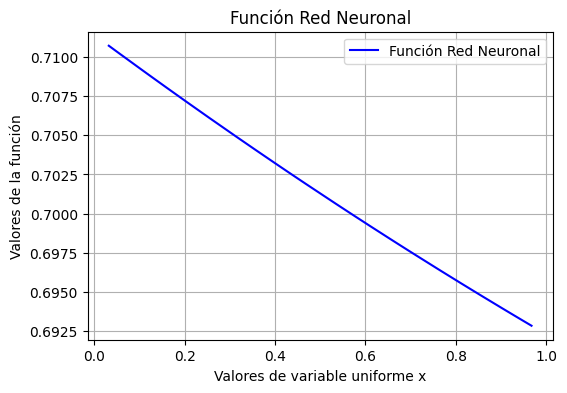

In [28]:
#Graficar red neuronal con theta mínimo obtenido por SGD
import matplotlib.pyplot as plt

# Crear un rango de iteraciones para el eje x
EjeX=sorted(X_test)
NN=Grafico[0]
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
plt.plot(EjeX, NN, label='Función Red Neuronal', color='blue')
plt.xlabel('Valores de variable uniforme x')
plt.ylabel('Valores de la función')
plt.title('Función Red Neuronal')
plt.legend()
plt.grid()
plt.show()

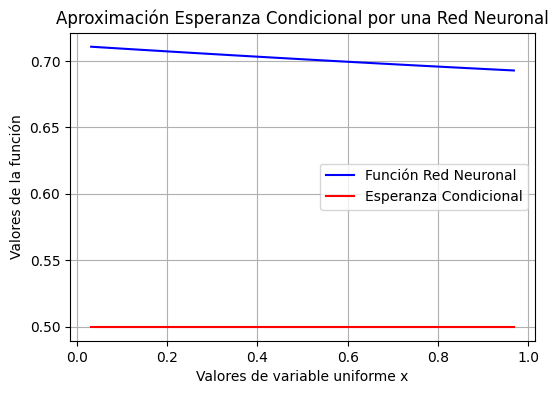

In [29]:
#Graficar red neuronal con theta mínimo obtenido por SGD vs Esperanza Condicional
import matplotlib.pyplot as plt

# Crear un rango de iteraciones para el eje x
EjeX=sorted(X_test)
EspCond=EsperanzaCondicional(X_test)
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
plt.plot(EjeX, NN, label='Función Red Neuronal', color='blue')
plt.plot(EjeX, EspCond, label='Esperanza Condicional', color='red')
plt.xlabel('Valores de variable uniforme x')
plt.ylabel('Valores de la función')
plt.title('Aproximación Esperanza Condicional por una Red Neuronal')
plt.legend()
plt.grid()
plt.show()

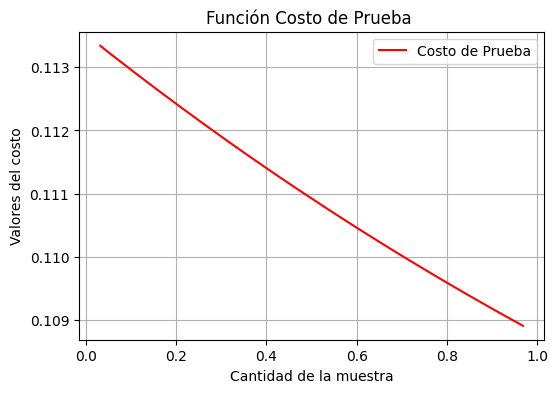

In [30]:
#Gráfico función de costo empírico

# Crear un rango de iteraciones para el eje x
#n_iterations = len(X_train)
#iterations1 = range(n_iterations)
m_iterations=len(X_test)
iterations2 = range(m_iterations)
#Entrenamiento=Graf[5]
Test=Grafico[1]
# Graficar las curvas de costo
plt.figure(figsize=(6, 4))
#plt.plot(EjeX, Entrenamiento , label='Costo de Entrenamiento', color='blue')
plt.plot(EjeX,Test , label='Costo de Prueba', color='red')
plt.xlabel('Cantidad de la muestra')
plt.ylabel('Valores del costo')
plt.title('Función Costo de Prueba ')
plt.legend()
plt.grid()
plt.show()
